In [ ]:
from torchfsm.operator import Operator, Convection, Laplacian

def Burgers(nu:float) -> Operator:
    return nu*Laplacian()-Convection()
burgers=Burgers(0.01)

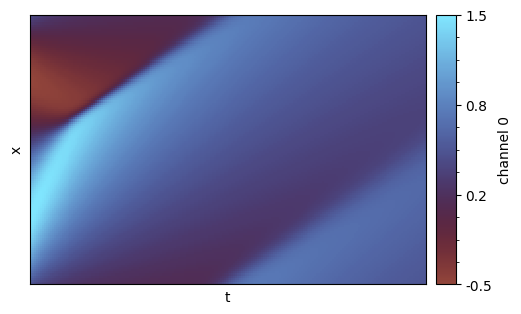

In [ ]:
from torchfsm.mesh import MeshGrid
from torchfsm.plot import plot_traj
from torchfsm.traj_recorder import AutoRecorder
import torch

device='cuda' if torch.cuda.is_available() else 'cpu'
L=1.0; N=128; 
mesh=MeshGrid([(0,L,N)],device=device)
x=mesh.bc_mesh_grid()
u_0=torch.sin(2*torch.pi*x/L)+0.5
traj=burgers.integrate(u_0=u_0,mesh=mesh,
    dt=0.01,step=200,
    trajectory_recorder=AutoRecorder(),
)
plot_traj(traj,animation=False,cmap="managua")

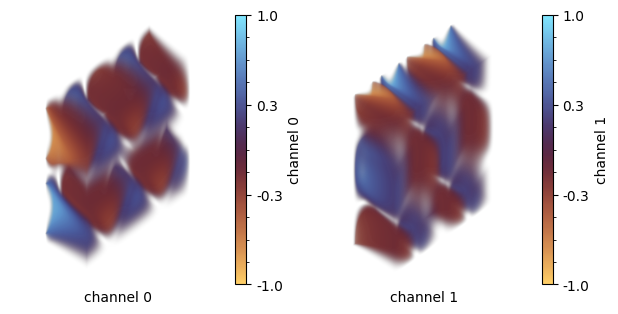

In [ ]:
mesh=MeshGrid([(0,L,N),(0,L,N)],device=device)
x,y=mesh.bc_mesh_grid()
u_0=torch.cat([torch.sin(2*torch.pi*x/L)*torch.cos(4*torch.pi*y/L),
               torch.cos(2*torch.pi*x/L)*torch.sin(4*torch.pi*y/L)],
              dim=1)
traj=burgers.integrate(u_0=u_0,mesh=mesh,
    dt=0.01,step=50,
    trajectory_recorder=AutoRecorder(),
)
plot_traj(traj,animation=False,cmap="managua")